In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import pandas as pd
import re

df = pd.read_excel("Data/딥러닝 컴피티션/data.xlsx")
df = df.dropna(subset=["document", "label"]).reset_index(drop=True)
df["document"] = df["document"].astype(str)

def clean_text(text):
    text = re.sub(r"[^가-힣ㄱ-ㅎㅏ-ㅣ\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_doc"] = df["document"].apply(clean_text)

In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_x, test_x, train_y, test_y = train_test_split(df["clean_doc"], df["label"], test_size=0.2, random_state=42)

# Tokenization
vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_x)

train_seq = tokenizer.texts_to_sequences(train_x)
test_seq = tokenizer.texts_to_sequences(test_x)

maxlen = 40
train_pad = pad_sequences(train_seq, maxlen=maxlen, padding="post", truncating="post")
test_pad = pad_sequences(test_seq, maxlen=maxlen, padding="post", truncating="post")

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from keras.layers import LSTM, Bidirectional
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Input(shape=(40,)),
    Embedding(input_dim=10000, output_dim=128),
    Dropout(0.5),

    Bidirectional(LSTM(64, kernel_regularizer=l2(0.001))),
    BatchNormalization(),
    Dropout(0.5),

    Dense(64, activation="relu", kernel_regularizer=l2(0.001)),
    Dropout(0.5),

    Dense(2, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

early_stop = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=1)

In [36]:
history = model.fit(
    train_pad, train_y,
    validation_data=(test_pad, test_y),
    epochs=20,
    batch_size=128,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 97ms/step - accuracy: 0.5606 - loss: 0.9698 - val_accuracy: 0.5018 - val_loss: 0.7748 - learning_rate: 0.0010
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step - accuracy: 0.7827 - loss: 0.5371 - val_accuracy: 0.6784 - val_loss: 0.6227 - learning_rate: 0.0010
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.8206 - loss: 0.4336 - val_accuracy: 0.7394 - val_loss: 0.5672 - learning_rate: 0.0010
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - accuracy: 0.8342 - loss: 0.3771 - val_accuracy: 0.7316 - val_loss: 0.7061 - learning_rate: 0.0010
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.8536 - loss: 0.3252 - val_accuracy: 0.5904 - val_loss: 2.0721 - learning_rate: 5.0000e-04


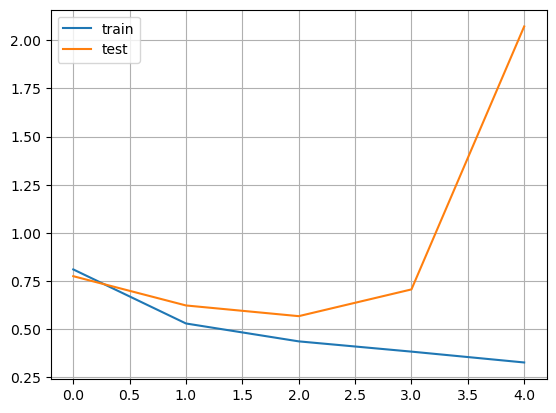

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"])
plt.grid()
plt.show()

In [39]:
loss, acc = model.evaluate(test_pad, test_y)
print(f"Test Accuracy: {acc:.4f}")

235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7438 - loss: 0.5512
Test Accuracy: 0.7394


# 한번에 

In [42]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Input, Bidirectional
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 1. 데이터 로드 및 정제
df = pd.read_excel("Data/딥러닝 컴피티션/data.xlsx")
df = df.dropna(subset=["document", "label"]).reset_index(drop=True)
df["document"] = df["document"].astype(str)

def clean_text(text):
    text = re.sub(r"[^가-힣ㄱ-ㅎㅏ-ㅣ\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_doc"] = df["document"].apply(clean_text)

# 2. 학습/검증 분할
train_x, test_x, train_y, test_y = train_test_split(
    df["clean_doc"], df["label"], test_size=0.2, random_state=42
)

# 3. 토큰화 및 시퀀스 변환
vocab_size = 10000
maxlen = 40
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_x)

train_seq = tokenizer.texts_to_sequences(train_x)
test_seq = tokenizer.texts_to_sequences(test_x)

train_pad = pad_sequences(train_seq, maxlen=maxlen, padding="post", truncating="post")
test_pad = pad_sequences(test_seq, maxlen=maxlen, padding="post", truncating="post")


model = Sequential([
    Input(shape=(40,)),
    Embedding(input_dim=10000, output_dim=128),
    Dropout(0.3),                          # Dropout은 과도하지 않게

    LSTM(64, return_sequences=False),     # 양방향 빼고 심플하게, 폭주 억제
    Dropout(0.3),                          # 과적합 방지 최소선 적용

    Dense(32, activation="relu"),
    Dropout(0.3),

    Dense(2, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

early_stop = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=1)

history = model.fit(
    train_pad, train_y,
    validation_data=(test_pad, test_y),
    epochs=20,
    batch_size=128,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

loss, acc = model.evaluate(test_pad, test_y)
print(f"✅ Test Accuracy: {acc:.4f}")


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.4971 - loss: 0.6937 - val_accuracy: 0.4999 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.5028 - loss: 0.6933 - val_accuracy: 0.4999 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.5047 - loss: 0.6931 - val_accuracy: 0.5311 - val_loss: 0.6905 - learning_rate: 5.0000e-04
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.5182 - loss: 0.6900 - val_accuracy: 0.5723 - val_loss: 0.6721 - learning_rate: 5.0000e-04
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.5632 - loss: 0.6690 - val_accuracy: 0.5918 - val_loss: 0.6695 - learning_rate: 5.0000e-04
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.6272 - loss: 0.6474 - val_accuracy: 0.6819 - val_loss: 0.6017 - learning_rate: 5.0000e-04
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accu

In [53]:
# !pip install transformers
# !pip install tf-keras
# !pip install tensorflow transformers tf-keras torch sentencepiece

In [59]:
# 1. 라이브러리 불러오기
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from transformers import TFBertForSequenceClassification, BertTokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')


# 1. 데이터 불러오기 및 전처리
df = pd.read_excel("Data/딥러닝 컴피티션/data.xlsx")   # ← 여기 파일 위치 맞게 수정
df = df.dropna(subset=["document", "label"])
df["document"] = df["document"].astype(str)

def clean_text(text):
    return text.strip()

df["clean_doc"] = df["document"].apply(clean_text)

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["clean_doc"].tolist(), df["label"].tolist(), test_size=0.2, random_state=42
)

# 2. 토크나이저 로드 및 토큰화
tokenizer = BertTokenizer.from_pretrained("monologg/kobert")
max_len = 64

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_len)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=max_len)

# 3. Tensorflow Dataset 만들기
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(
        input_ids=tf.constant(train_encodings["input_ids"]),
        attention_mask=tf.constant(train_encodings["attention_mask"])
    ),
    tf.constant(train_labels)
)).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(
        input_ids=tf.constant(test_encodings["input_ids"]),
        attention_mask=tf.constant(test_encodings["attention_mask"])
    ),
    tf.constant(test_labels)
)).batch(32)

# 4. 모델 로드 (이게 핵심: classification을 위한 ready-made 모델)
from transformers import TFBertForSequenceClassification
model = TFBertForSequenceClassification.from_pretrained("monologg/kobert", num_labels=2)

# 5. 컴파일 및 학습
from transformers import create_optimizer

# HuggingFace 호환 옵티마이저 사용
steps_per_epoch = len(train_dataset)
num_train_steps = steps_per_epoch * 3
optimizer, _ = create_optimizer(init_lr=2e-5, num_warmup_steps=0, num_train_steps=num_train_steps)

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=3
)

# 6. 평가
loss, acc = model.evaluate(test_dataset)
print(f"✅ Test Accuracy: {acc:.4f}")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'KoBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3


 42/939 [>.............................] - ETA: 1:44:30 - loss: 0.7034 - accuracy: 0.4807

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"])
plt.grid()
plt.show()